# <center> ASSESSMENT 2 </center>

## Implement the Linear Regression algorithm from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

### STEP 1: Reading the dataset into a DataFrame

In [979]:
import pandas as pd
df = pd.read_csv("Medical Price Dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [980]:
# Retrieving the column information
df.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [981]:
df.shape

(1338, 7)

In [982]:
# Retrieving statistics of all columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [983]:
# Retrieving data-types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [984]:
# Information about null values in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## STEP 2: Data Preprocessing

In [985]:
# Label Encoding for sex column
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['sex']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [986]:
# Label Encoding for smoker column
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [987]:
# Label Encoding for region column
df['region'] = df['region'].map({'southwest':1, 'southeast':2,'northwest':3,'northeast':4 })
df['region']

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [988]:
print(df['sex'].isnull().sum())
print(df['smoker'].isnull().sum())
print(df['region'].isnull().sum())

0
0
0


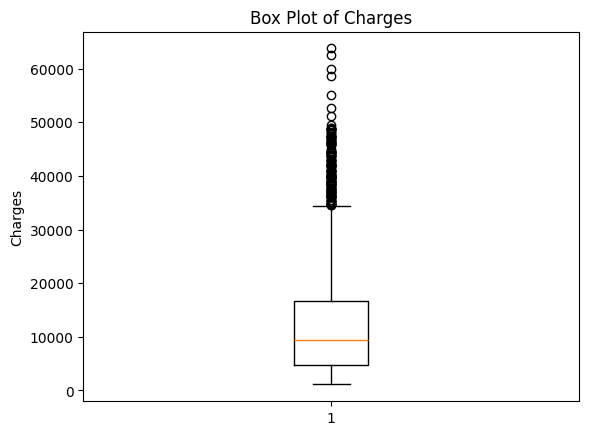

In [989]:
import matplotlib.pyplot as plt

plt.boxplot(df['charges'])
plt.title('Box Plot of Charges')
plt.ylabel('Charges')
plt.show()

In [990]:
# Handling outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['charges_capped'] = df['charges'].clip(lower=lower_bound, upper=upper_bound)

Text(0.5, 1.0, 'CORRELATION HEATMAP')

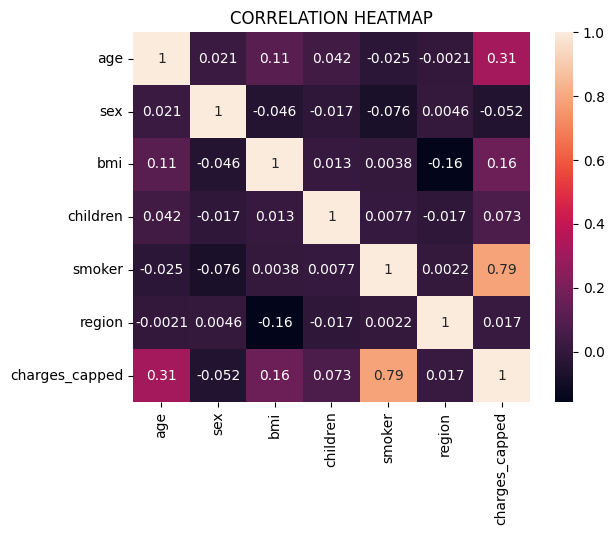

In [991]:
# Feature Selection
# Plotting heatmap to understand correlation
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges_capped']]

cor = df2.corr()
sns.heatmap(cor, annot=True)
plt.title("CORRELATION HEATMAP")

## STEP 3: Implementation of Linear Regression algorithm

In [992]:
from sklearn.model_selection import train_test_split

# Feature Selection
df['bmi_smoker'] = df['bmi'] * df['smoker']
X = df[['age', 'smoker','bmi_smoker']]
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [993]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  
x_test_scaled = scaler.transform(x_test) 
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Regression fucntion
import numpy as np
def linear_regression(x_train, y_train):
    X = x_train.values
    y = y_train.values.reshape(-1, 1)
    X_b = np.c_[np.ones((len(X), 1)), X]  # Add intercept term
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta.flatten()

# Prediction Function
def predict(x, theta):
    X = x.values
    X_b = np.c_[np.ones((len(X), 1)), X]
    return X_b.dot(theta)

## STEP 4: Training & Prediction

In [994]:
# Training
m = linear_regression(x_train_scaled_df, y_train)

# Predicting
y_pred = predict(x_test_scaled_df, m)

## STEP 5: Performance Evaluation

In [995]:
res = pd.DataFrame({'Actual': y_test.to_numpy().flatten(),'Predicted': y_pred.flatten()})
print(res.head(10))

        Actual     Predicted
0   9095.06825   9982.526830
1   5272.17580   7584.722643
2  29330.98315  33400.700085
3   9301.89355  10248.949517
4  33750.29180  28775.006308
5   4536.25900   7051.877268
6   2117.33885   3055.536957
7  14210.53595  15044.557891
8   3732.62510   5453.341144
9  10264.44210  11048.217580


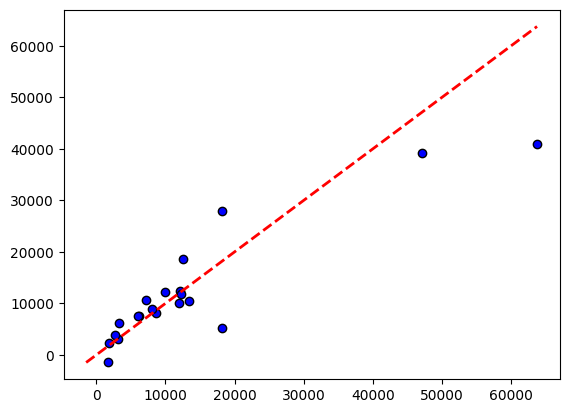

In [996]:
# Plotting Results
import matplotlib.pyplot as plt
subset = results.tail(20)
plt.scatter(subset['Actual Charges'], subset['Predicted Charges'], color='blue', edgecolors='k')
min_val = min(subset['Actual Charges'].min(), subset['Predicted Charges'].min())
max_val = max(subset['Actual Charges'].max(), subset['Predicted Charges'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
plt.show()

In [997]:
# Checking Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 2850.21
MSE: 21895207.33
RMSE: 4679.23
R² Score: 0.86


## Conclusion

### After exploring various approaches, including standardization, gradient descent vs normal equation method, and outlier handling, the best achieved model performance is 0.86 (R² Score). 